# EMAIL SPAM DETECTION BY USING MACHINE LEARNING

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.

## SET UP

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder from scikit-learn
from wordcloud import WordCloud, STOPWORDS # Importing necessary libraries for creating WordCloud


### Loading the dataset

In [118]:

df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1", "v2"])


df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## DATA PROCESSING

### Renaming the columns

In [119]:
# Renaming the columns to enhance readability
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

# Displaying the DataFrame with updated column names
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Converting category colmn into numeric

In [120]:

le = LabelEncoder()

# Encoding the 'Category' column (spam or non-spam) with numerical labels
df["Category"] = le.fit_transform(df["Category"])


df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## ANALYZING DATA

### Checking Shape of dataset

In [121]:
# Shape of the dataset
df.shape

(5572, 2)

### Displaying information about the dataset



In [122]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


### Checking for null values

In [123]:
# Checking for null values in the DataFrame
df.isnull().sum()


Category    0
Message     0
dtype: int64

### Checking for duplicate values

In [124]:
# Checking for duplicate values in the DataFrame
df.duplicated().sum()


np.int64(403)

### Dropping duplicate

In [125]:
# Dropping duplicate rows in the DataFrame, keeping the first occurrence
df = df.drop_duplicates(keep="first")

# Checking for duplicate values after dropping
df.duplicated().sum()

np.int64(0)

### Displaying the updated shape of the DataFrame



In [126]:
# Displaying the updated shape of the DataFrame
df.shape

(5169, 2)

### Displaying counts of 'Ham' (0) and 'Spam' (1)

In [127]:
# Displaying counts of 'Ham' (0) and 'Spam' (1) in the 'Category' column
df["Category"].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

## DATA VISUALIZATION

### Pie Chart for the distribution of 'Ham' and 'Spam'

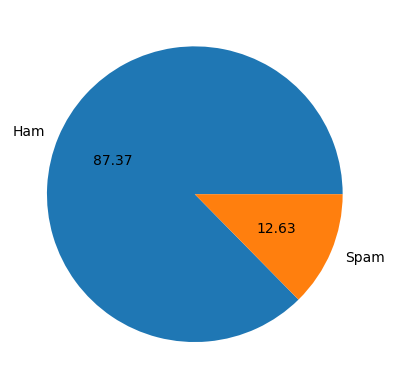

In [128]:
# Creating a Pie Chart for the distribution of 'Ham' and 'Spam' in the 'Category' column
plt.pie(df["Category"].value_counts(), autopct="%.2f", labels=['Ham', 'Spam'])
plt.show()


### Bar Chart for the class distribution of 'Ham' and 'Spam'

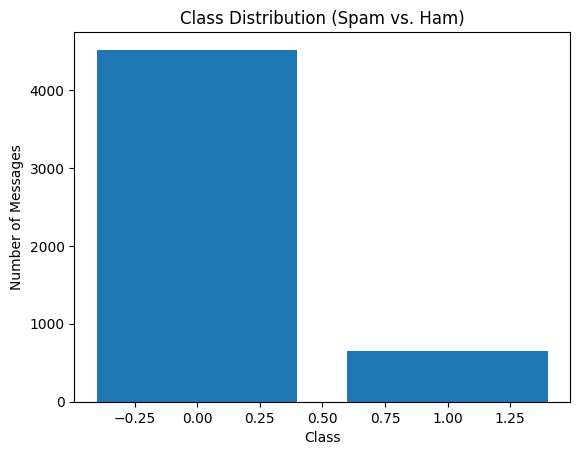

In [129]:
# Creating a Bar Chart for the class distribution of 'Ham' and 'Spam' in the 'Category' column
class_counts = df['Category'].value_counts()

# Plotting the bar chart with x-axis as class labels (0 and 1) and y-axis as counts
plt.bar(class_counts.index, class_counts.values)

# Adding labels to x-axis and y-axis for better readability
plt.xlabel('Class')
plt.ylabel('Number of Messages')

# Setting the title of the chart
plt.title('Class Distribution (Spam vs. Ham)')

# Displaying the chart
plt.show()


### Visualize the distribution of message lengths for both spam and ham messages
### 'Ham' (0) and 'Spam' (1)

C:\Users\naman\AppData\Local\Temp\ipykernel_14620\3911043851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message_Length'] = df['Message'].apply(len)


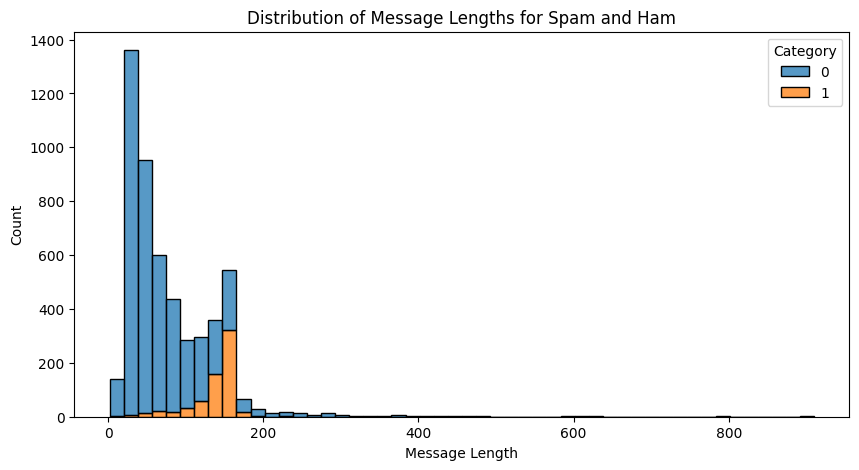

In [130]:
# Adding a new column 'Message_Length' to the DataFrame, representing the length of each message
df['Message_Length'] = df['Message'].apply(len)

# Creating a new figure with a specified size (width=10, height=5) for the histogram
plt.figure(figsize=(10, 5))

# Plotting a histogram using Seaborn, with x-axis as 'Message_Length', differentiating by 'Category' (spam or ham)
sns.histplot(df, x='Message_Length', hue='Category', multiple='stack', bins=50)

# Adding labels to x-axis and y-axis for better interpretation
plt.xlabel('Message Length')
plt.ylabel('Count')

# Setting the title of the histogram
plt.title('Distribution of Message Lengths for Spam and Ham')

# Displaying the histogram
plt.show()

### Visualizing the relationship between message lengths and message categories

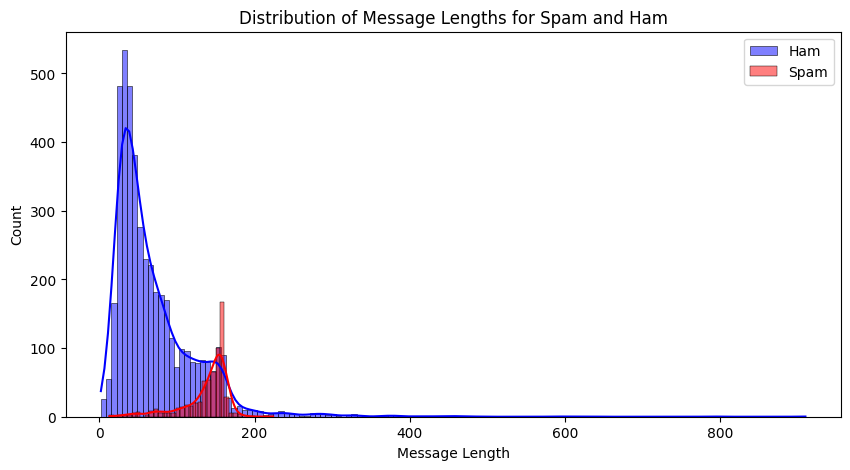

In [131]:
# Creating separate histograms for 'Ham' and 'Spam' messages
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Category'] == 0]['Message_Length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['Category'] == 1]['Message_Length'], color='red', label='Spam', kde=True)

# Adding labels to x-axis and y-axis for better interpretation
plt.xlabel('Message Length')
plt.ylabel('Count')

# Adding a title to the histogram
plt.title('Distribution of Message Lengths for Spam and Ham')

# Adding a legend to clarify which color corresponds to 'Ham' and 'Spam'
plt.legend()

# Displaying the histogram
plt.show()


### Heatmap for visualizing the correlations

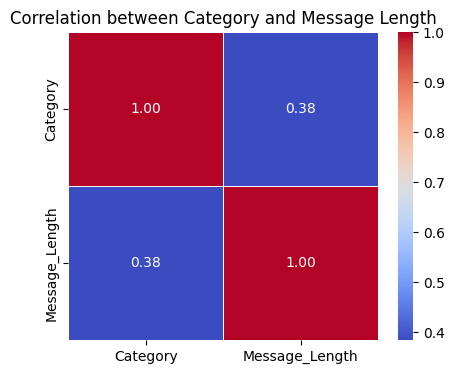

In [132]:
# Selecting relevant columns for correlation analysis
correlation_columns = df[['Category', 'Message_Length']]

# Calculating the correlation matrix for the selected columns
correlation_matrix = correlation_columns.corr()

# Creating a heatmap to visualize the correlation between 'Category' and 'Message_Length'
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding a title to the heatmap
plt.title('Correlation between Category and Message Length')

# Displaying the heatmap
plt.show()


### Generate a word cloud visualization based on the words present in the 'Message' column of your DataFrame.

In [133]:
# Initializing an empty string to store words from the 'Message' column
comment_words = ''

# Setting up a set of stopwords for WordCloud
stopwords = set(STOPWORDS)

# Iterating through each message in the 'Message' column
for val in df.Message:
    val = str(val)
    # Splitting the message into tokens
    tokens = val.split()
    
    # Converting each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    # Joining the lowercase tokens to the 'comment_words' string
    comment_words += " ".join(tokens)+" "

# Generating WordCloud with specified parameters
wordcloud = WordCloud(width=800, height=600,
                      background_color='#f8f8ff',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)


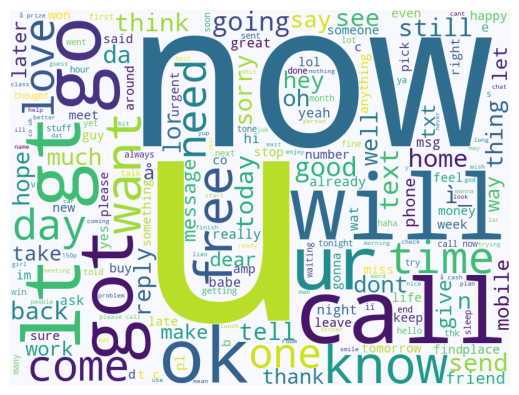

In [134]:
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## MODEL

In [135]:
# Extracting the 'Message' column from the DataFrame and assigning it to the variable 'x'
x = df['Message']

# Displaying the content of the 'x' variable (the 'Message' column)
x


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [136]:
# Extracting the 'Category' column from the DataFrame and assigning it to the variable 'y'
y = df["Category"]

# Displaying the content of the 'y' variable (the 'Category' column)
y


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int64

### Splitting the data into train and test data


In [137]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the 'x' and 'y' data into training and testing sets
# The test_size parameter determines the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Training The Model

In [138]:
# Importing the CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Creating an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer on the training data to build the vocabulary
vectorizer.fit(x_train)

# Transforming the training and testing data into feature vectors using the fitted vectorizer
X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)


In [139]:
# Importing LogisticRegression from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Creating an instance of Logistic Regression
logreg = LogisticRegression()

# Training the Logistic Regression model on the training data
logreg.fit(X_train_cv, y_train)


LogisticRegression()

### Accuracy

In [140]:
# Making predictions on the test set using the trained Logistic Regression model
y_pred = logreg.predict(X_test_cv)

# Calculating and printing the accuracy of the logistic regression classifier on the test set
accuracy = logreg.score(X_test_cv, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))


Accuracy of logistic regression classifier on test set: 0.98


### Confusion Matrix

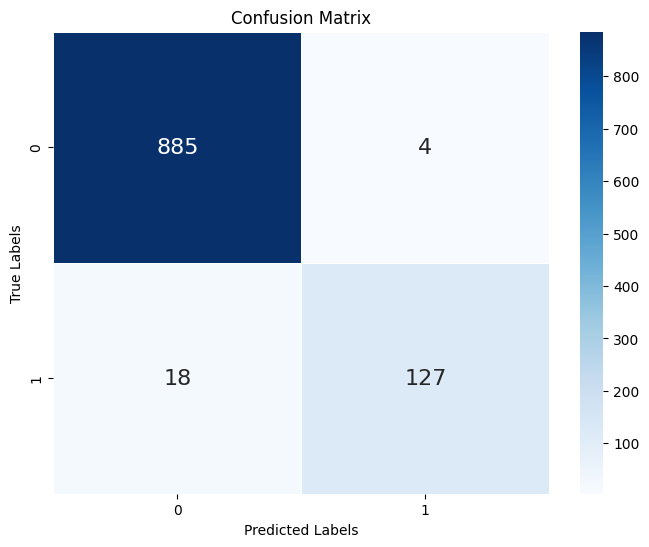


Precision: 0.97
Recall: 0.88


In [141]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Generating the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16})

# Adding labels and title for better interpretation
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Displaying the confusion matrix heatmap
plt.show()

# Extracting values for better interpretation
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculating and printing additional metrics for evaluation
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


### Classification Report

In [142]:
# Importing classification_report from scikit-learn's metrics module
from sklearn.metrics import classification_report

# Generating and printing a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [143]:
# Importing necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating and storing accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


## CUSTOM WORD PREDICTION

In [144]:
# Importing MultinomialNB from scikit-learn's naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Creating an instance of Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Training the classifier on the training data using Count Vectorized features (X_train_cv) and corresponding labels (y_train)
classifier.fit(X_train_cv, y_train)


MultinomialNB()

In [145]:
# Defining a custom word for prediction
custom_word = "Offer for internship"

# Transforming the custom word into a Count Vector representation using the fitted vectorizer
custom_word_vec = vectorizer.transform([custom_word])

# Making a prediction using the trained Multinomial Naive Bayes classifier
prediction = classifier.predict(custom_word_vec)[0]

# Converting the numerical prediction to human-readable labels
if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

# Printing the prediction result for the custom word
print(f"Custom word '{custom_word}' is predicted as: {prediction}")


Custom word 'Offer for internship' is predicted as: Spam


Training KNN, Decision Tree, and Logistic Regression Models

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the dataset into features (X) and labels (y)
X = df['Message']  # Replace with your message column name
y = df['Category']  # Replace with your category/label column name

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Adjust max_features if needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Vectorized Training Data Shape: {X_train_vec.shape}")
print(f"Vectorized Testing Data Shape: {X_test_vec.shape}")


Vectorized Training Data Shape: (4135, 5000)
Vectorized Testing Data Shape: (1034, 5000)


In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train models and store predictions
predictions = {}
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_vec, y_train)  # X_train_vec is your vectorized training data
    y_pred = model.predict(X_test_vec)  # X_test_vec is your vectorized testing data
    predictions[model_name] = y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}\n")


Training KNN...
KNN Metrics:
Accuracy: 0.91, Precision: 0.91, Recall: 0.91, F1-Score: 0.88

Training Decision Tree...
Decision Tree Metrics:
Accuracy: 0.96, Precision: 0.96, Recall: 0.96, F1-Score: 0.96

Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



 Confusion Matrices

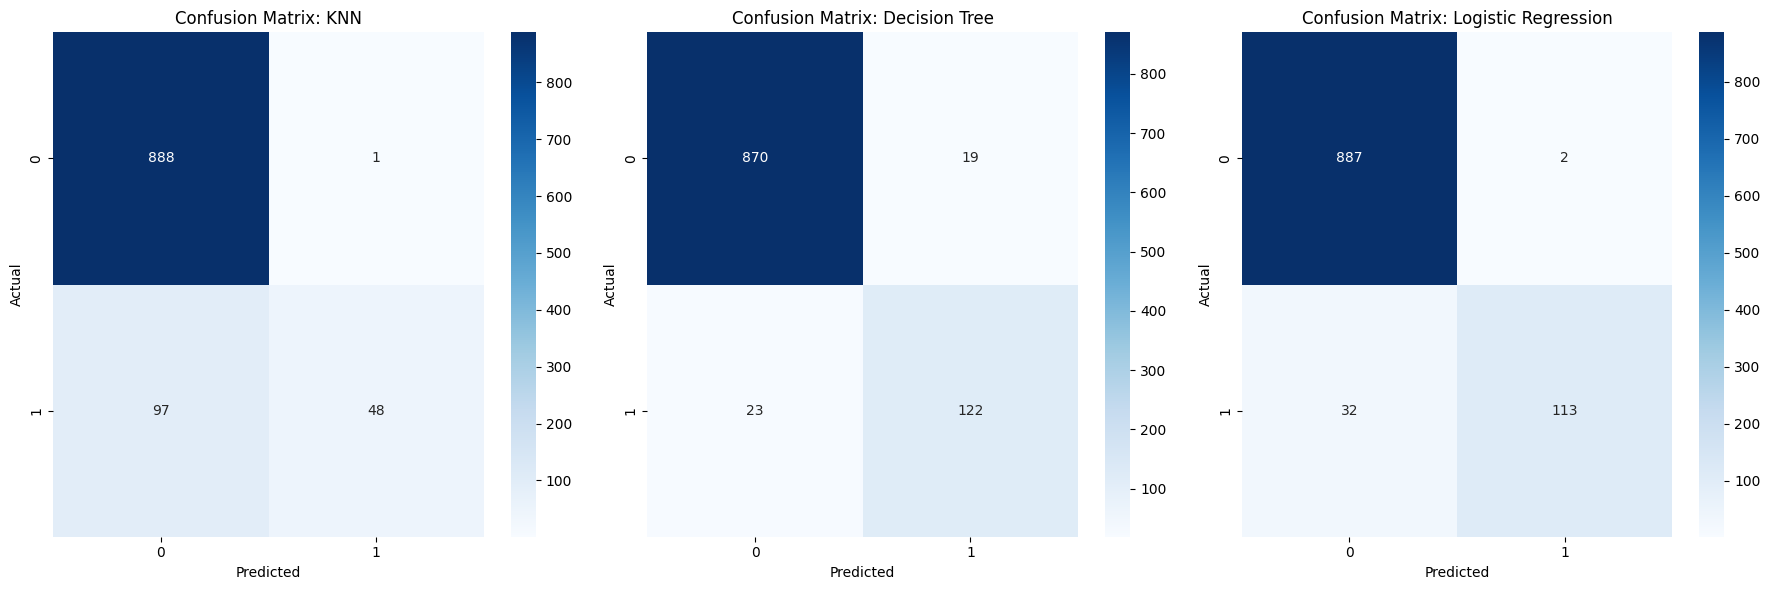

In [149]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, y_pred) in enumerate(predictions.items()):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {model_name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Decision Tree Visualization

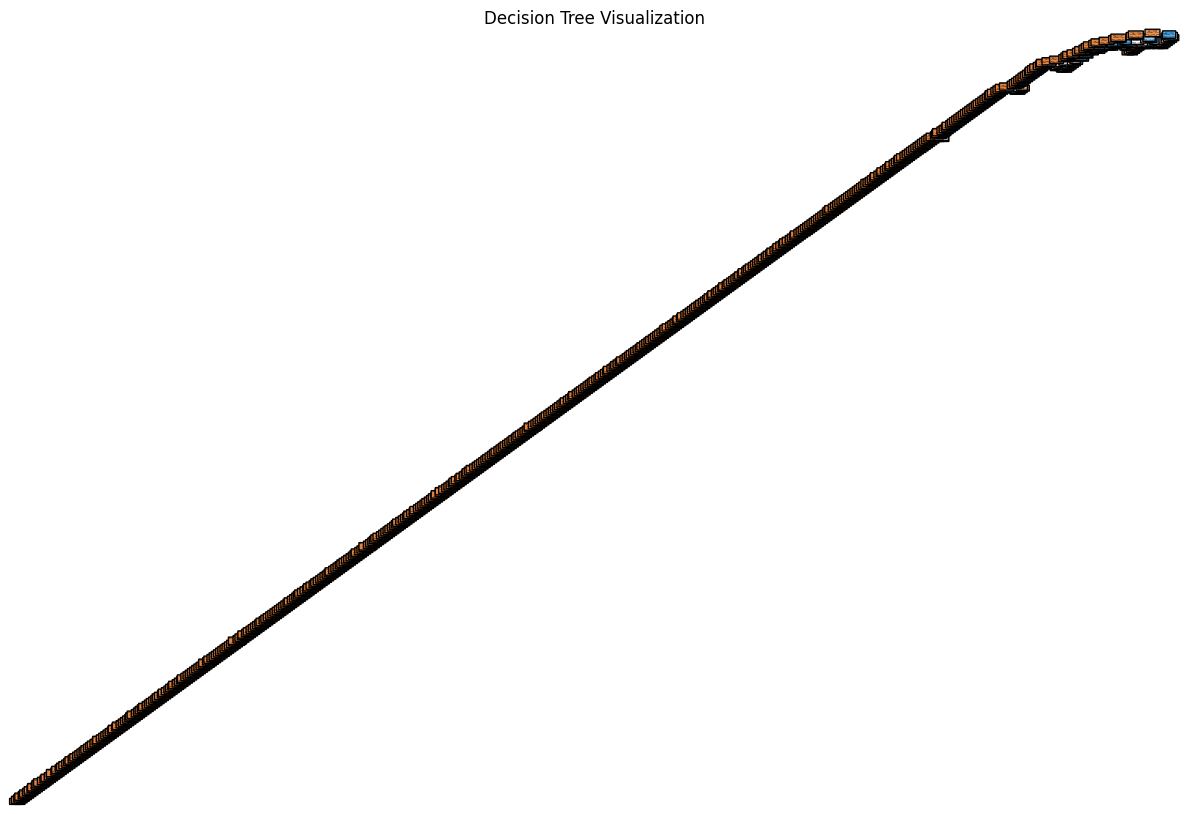

In [150]:
# Visualizing Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(models["Decision Tree"], filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=["Ham", "Spam"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Comparison Graph for Performance Metrics

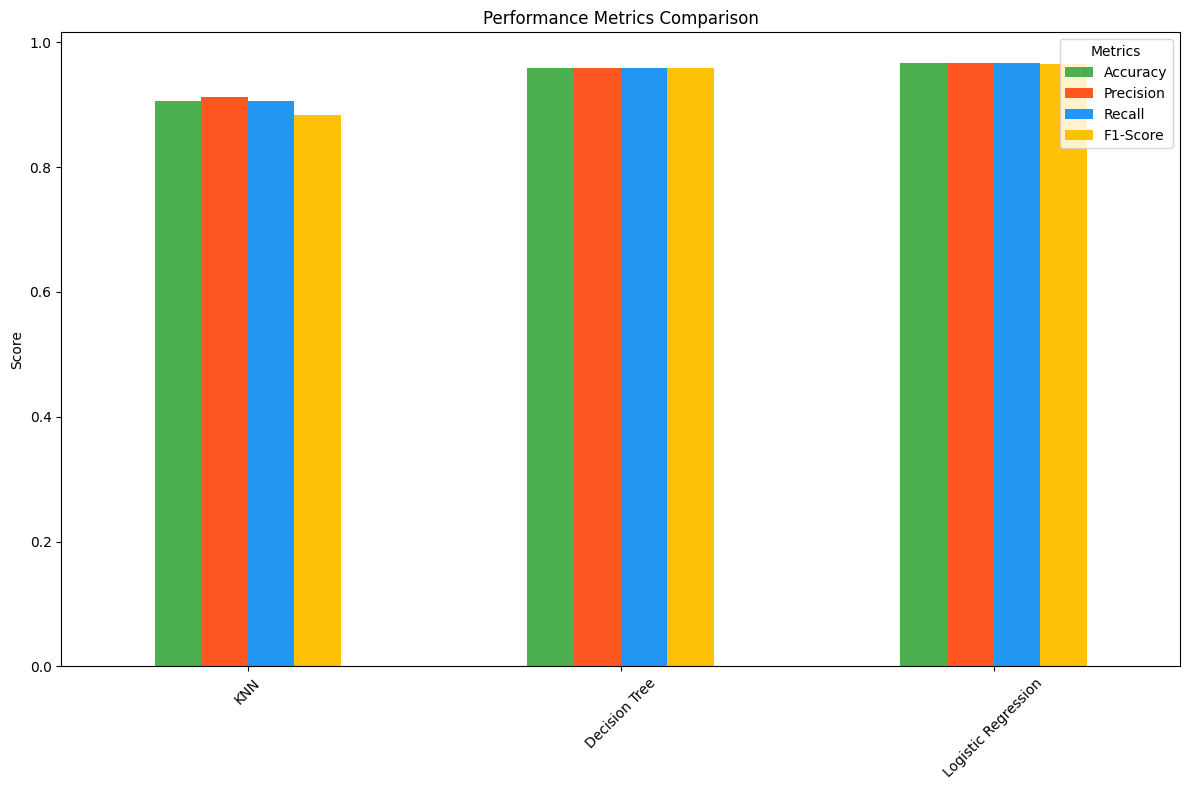

In [151]:
# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# Plot bar graphs for each metric
results_df.plot(kind='bar', figsize=(12, 8), color=['#4CAF50', '#FF5722', '#2196F3', '#FFC107'])
plt.title("Performance Metrics Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


Precision-Recall Curve

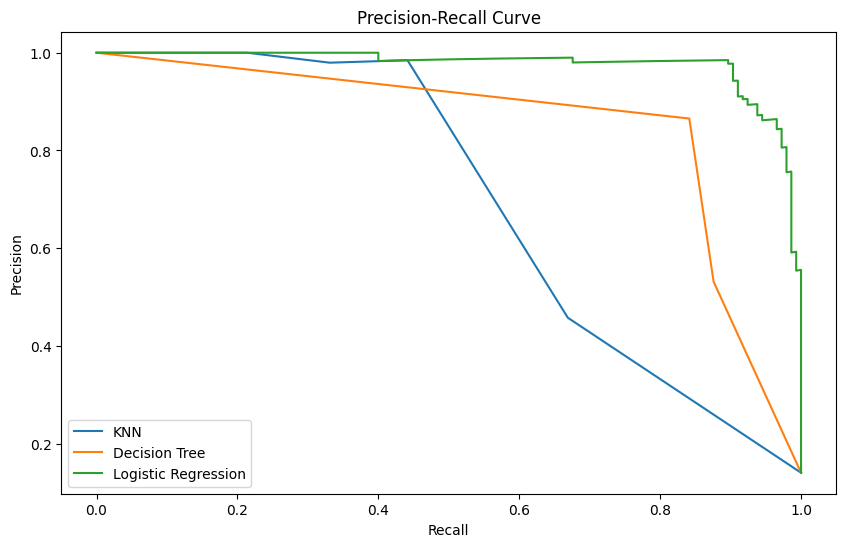

In [152]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):  # Only models with predict_proba
        y_prob = model.predict_proba(X_test_vec)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=y_test.max())
        plt.plot(recall, precision, label=model_name)

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()


ROC Curve

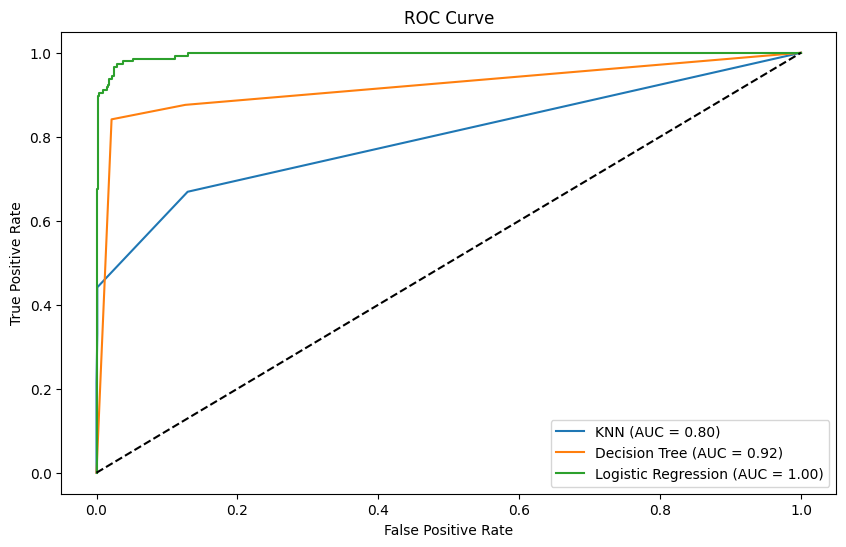

In [153]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):  # Only models with predict_proba
        y_prob = model.predict_proba(X_test_vec)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Radar Chart for Final Comparison

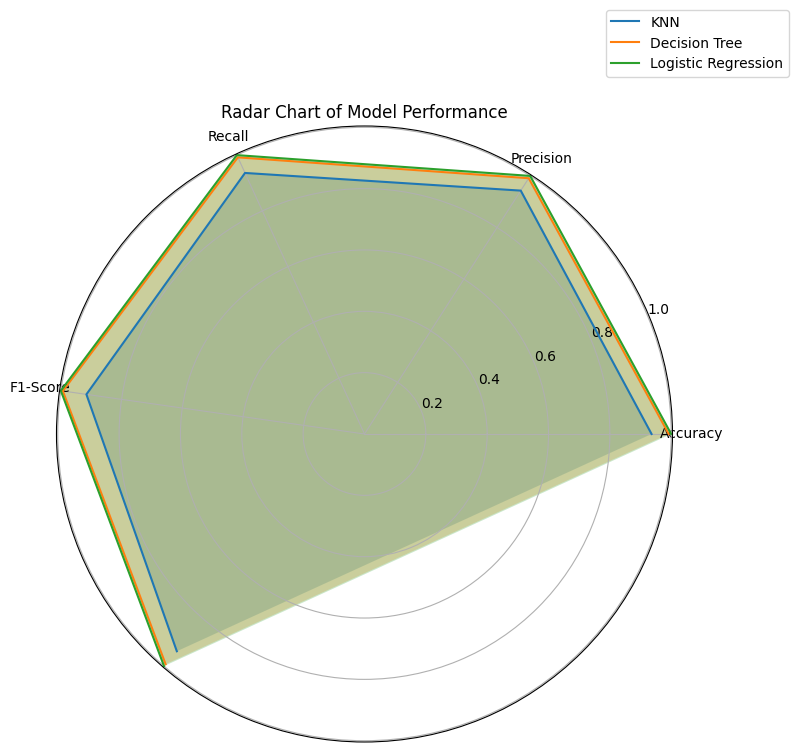

In [154]:
from math import pi

# Prepare data for radar chart
metrics_df_normalized = results_df / results_df.max()  # Normalize scores for fair comparison
categories = metrics_df_normalized.columns

# Radar chart setup
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plot each model
for model_name in metrics_df_normalized.index:
    values = metrics_df_normalized.loc[model_name].values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(range(len(categories) + 1), values, label=model_name)
    ax.fill(range(len(categories) + 1), values, alpha=0.25)

# Formatting
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
plt.title("Radar Chart of Model Performance")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.2))
plt.show()


Bar Graph for Model Performance

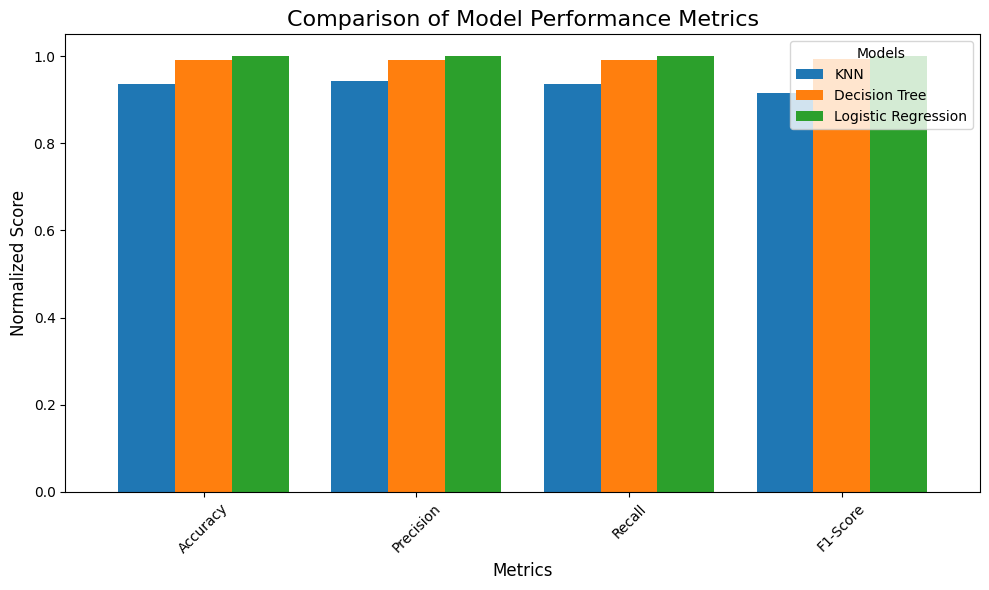

In [155]:
# Bar Graph for Model Performance
import matplotlib.pyplot as plt

# Plot bar graphs for each metric
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df_normalized.T.plot(kind='bar', ax=ax, width=0.8)

# Formatting
ax.set_title("Comparison of Model Performance Metrics", fontsize=16)
ax.set_ylabel("Normalized Score", fontsize=12)
ax.set_xlabel("Metrics", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Models", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


ASK THIS IF YOR CODE IS WORKING 

In [161]:
# Taking a custom word from the user
custom_word = input("Enter a phrase or sentence to classify (e.g., 'Offer for internship'): ")

# Transforming the custom word into a vector using the same vectorizer used for training
custom_word_vec = vectorizer.transform([custom_word])

# Loop through each model to make predictions
for model_name, model in models.items():
    # Making a prediction using the current model
    prediction = model.predict(custom_word_vec)[0]
    
    # Converting the numerical prediction to human-readable labels
    prediction_label = "Spam" if prediction == 1 else "Ham"
    
    # Printing the prediction result for the custom word
    print(f"The input '{custom_word}' is predicted as: {prediction_label} by {model_name}")


Enter a phrase or sentence to classify (e.g., 'Offer for internship'):  Miracle Weight Loss Pill - Try it Today!


The input 'Miracle Weight Loss Pill - Try it Today!' is predicted as: Ham by KNN
The input 'Miracle Weight Loss Pill - Try it Today!' is predicted as: Ham by Decision Tree
The input 'Miracle Weight Loss Pill - Try it Today!' is predicted as: Ham by Logistic Regression


In [110]:
# Importing LogisticRegression from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Creating an instance of Logistic Regression
logreg = LogisticRegression()

# Training the Logistic Regression model on the training data
logreg.fit(X_train_cv, y_train)

LogisticRegression()

In [112]:
# Importing KNeighborsClassifier from scikit-learn's neighbors module
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Creating an instance of K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Training the K-Nearest Neighbors model on the training data
knn.fit(X_train_cv, y_train)


KNeighborsClassifier()

In [113]:
# Importing DecisionTreeClassifier from scikit-learn's tree module
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Creating an instance of Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model on the training data
dt.fit(X_train_cv, y_train)


DecisionTreeClassifier(random_state=42)

In [114]:
# Importing MultinomialNB from scikit-learn's naive_bayes module
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Creating an instance of Multinomial Naive Bayes
nb = MultinomialNB()

# Training the Multinomial Naive Bayes model on the training data
nb.fit(X_train_cv, y_train)


MultinomialNB()